In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statistics import mean

train_airbnb_df = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin.csv")
train_airbnb_df_c = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin_cleaned.csv")
data_train = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/data_train.csv")
data_val = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/data_val.csv")
data_test = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/data_test.csv")
print(len(data_train), len(data_val), len(data_test))

columns = list(data_train.columns)
columns.remove('Price')
X_train = data_train[columns]
y_train = data_train['Price']
X_val = data_val[columns]
y_val = data_val['Price']
X_test = data_test[columns]
y_test = data_test['Price']

9772 2443 3054


In [35]:
train_airbnb_df_c['Price'].describe()

count    15270.000000
mean        60.043680
std         47.661471
min          8.000000
25%         32.000000
50%         49.000000
75%         70.000000
max        900.000000
Name: Price, dtype: float64

See the proportion of the categories for feature Accomodates

In [3]:
print("Value counts for feature Accomodates in cleaned dataset")
print(train_airbnb_df_c["Accomodates"].value_counts())
print("Value counts for feature Accomodates in train dataset")
print(data_train["Accomodates"].value_counts())
print("Value counts for feature Accomodates in val dataset")
print(data_val["Accomodates"].value_counts())
print("Value counts for feature Accomodates in test dataset")
print(data_test["Accomodates"].value_counts())

Value counts for feature Accomodates in cleaned dataset
2.0     8323
4.0     2183
3.0     1846
1.0     1703
6.0      500
5.0      462
8.0       95
7.0       77
9.0       36
10.0      32
12.0      12
16.0       1
Name: Accomodates, dtype: int64
Value counts for feature Accomodates in train dataset
0.090909    5326
0.272727    1397
0.181818    1181
0.000000    1090
0.454545     320
0.363636     295
0.636364      61
0.545455      50
0.727273      23
0.818182      21
1.000000       8
Name: Accomodates, dtype: int64
Value counts for feature Accomodates in val dataset
0.090909    1332
0.272727     349
0.181818     296
0.000000     272
0.454545      80
0.363636      74
0.636364      15
0.545455      12
0.727273       6
0.818182       5
1.000000       2
Name: Accomodates, dtype: int64
Value counts for feature Accomodates in test dataset
0.090909    1665
0.272727     437
0.181818     369
0.000000     341
0.454545     100
0.363636      93
0.636364      19
0.545455      15
0.727273       7
0.8181

Plot Prices as a function of Accomodates (Pearson coefficient = 0.5)

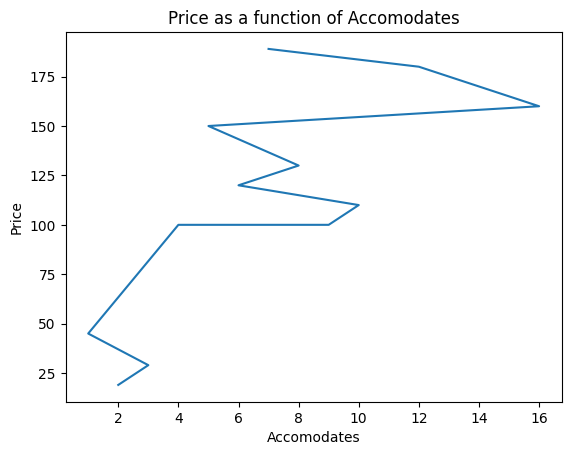

In [9]:
accomodates = train_airbnb_df_c["Accomodates"]
prices = train_airbnb_df_c["Price"]
data = {}
for i in range(len(prices)):
    data[accomodates[i]] = prices[i]
sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

plt.plot(list(sorted_data.keys()), list(sorted_data.values()))
plt.xlabel("Accomodates")
plt.ylabel("Price")
plt.title("Price as a function of Accomodates")
plt.show()

In [10]:
len(train_airbnb_df_c.columns)

38

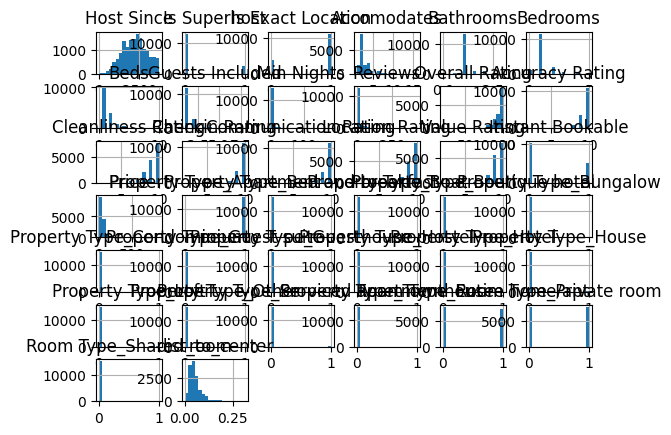

In [113]:
hist = train_airbnb_df_c.hist(bins=18)

### Which category to stratify

In [6]:
coeffs, cols = [], []
columns = list(train_airbnb_df_c.columns)
for col in columns:
    if col != 'Price':
        cols += [col]
        corr, _ = pearsonr(train_airbnb_df_c[col], train_airbnb_df_c["Price"])
        coeffs += [corr]
data = {}
for i in range(len(cols)):
    data[cols[i]] = coeffs[i]
sorted_data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1])}

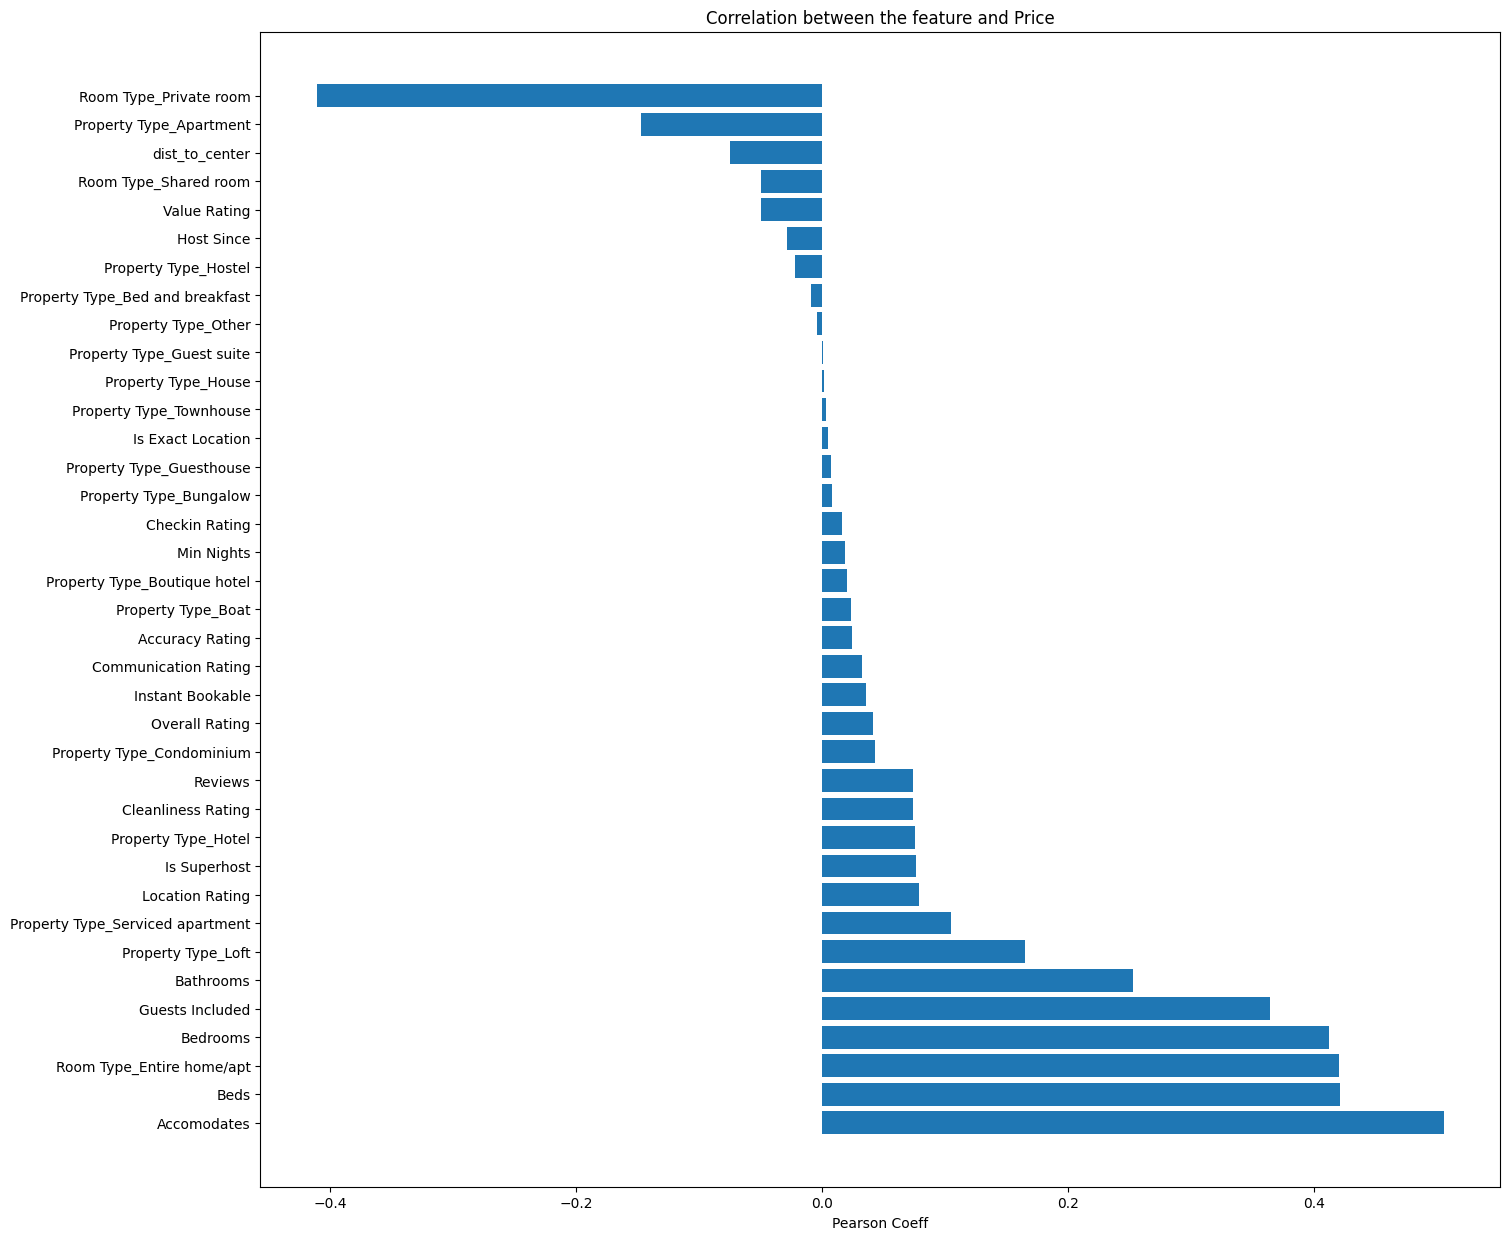

In [14]:
plt.rcdefaults()
fig, ax = plt.subplots()
fig.set_size_inches(16, 15)
performance = 100.0

cols = list(sorted_data.keys())
coeffs = list(sorted_data.values())
ax.barh(np.arange(len(cols)), coeffs, align='center')
ax.set_yticks(np.arange(len(cols)), labels=cols)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Pearson Coeff')
ax.set_title('Correlation between the feature and Price')

plt.show()

### Box plot for features before scaling

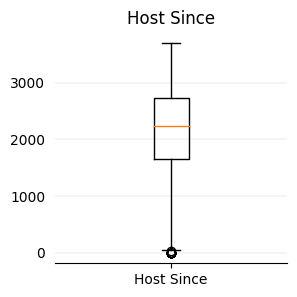

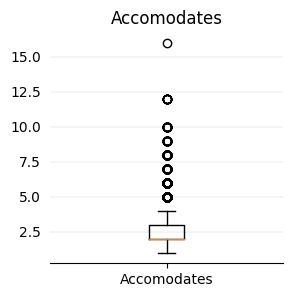

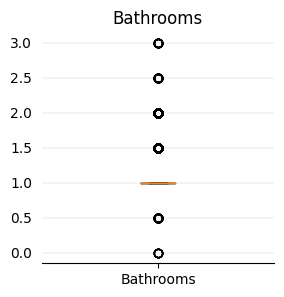

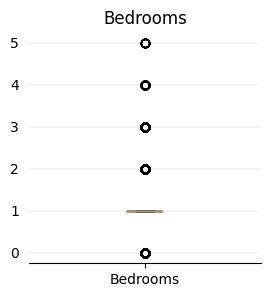

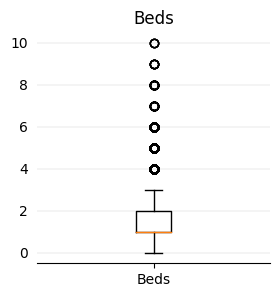

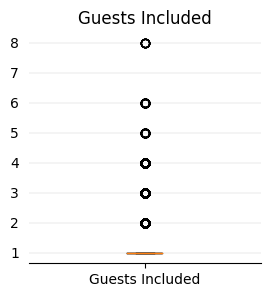

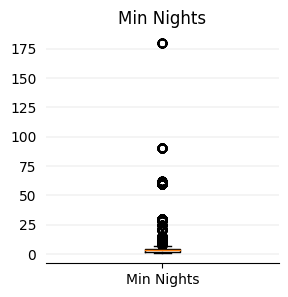

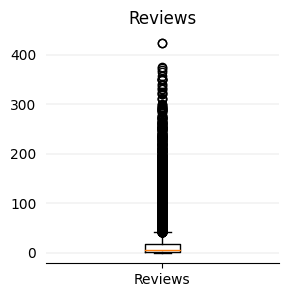

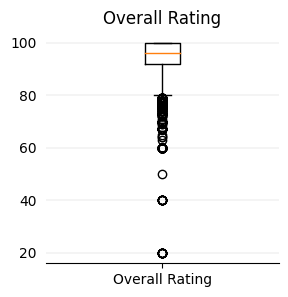

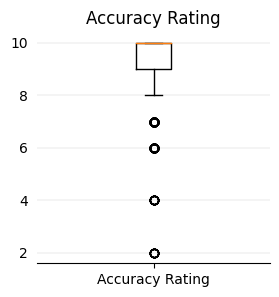

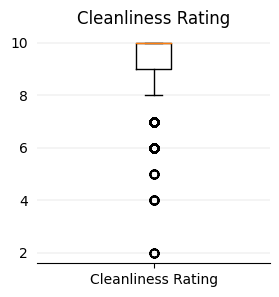

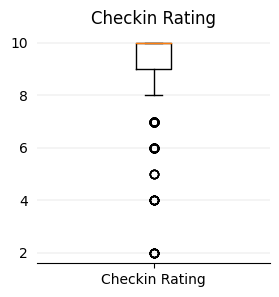

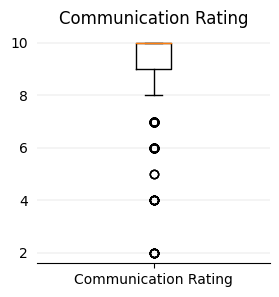

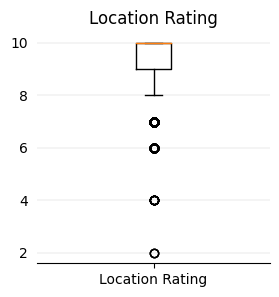

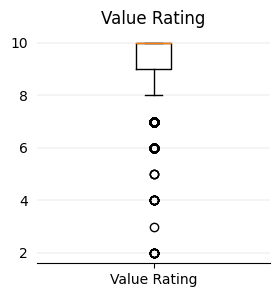

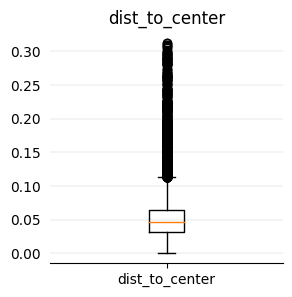

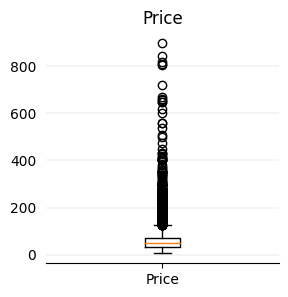

In [4]:
columns = [
    'Host Since',
    # 'Is Superhost',
    # 'Is Exact Location',
    'Accomodates',
    'Bathrooms',
    'Bedrooms',
    'Beds',
    'Guests Included',
    'Min Nights',
    'Reviews',
    'Overall Rating',
    'Accuracy Rating',
    'Cleanliness Rating',
    'Checkin Rating',
    'Communication Rating',
    'Location Rating',
    'Value Rating',
    # 'Instant Bookable',
    # 'Business Travel Ready',
    'dist_to_center',
    'Price'
]
for column in columns:
    # Visualize petal length distribution for all species
    fig, ax = plt.subplots(figsize=(3, 3))
    # Remove top and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Remove y-axis tick marks
    ax.yaxis.set_ticks_position('none')
    # Add major gridlines in the y-axis
    ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5)
    # Set plot title
    ax.set_title(column)
    ax.boxplot(train_airbnb_df_c[column].dropna().to_numpy(), labels=[column])
    # ax.set_ylim(0, 300)
    plt.show()

In [92]:
train_airbnb_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15270 entries, 0 to 15269
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Host Since                        15270 non-null  float64
 1   Is Superhost                      15270 non-null  float64
 2   Is Exact Location                 15270 non-null  float64
 3   Accomodates                       15270 non-null  float64
 4   Bathrooms                         15270 non-null  float64
 5   Bedrooms                          15270 non-null  float64
 6   Beds                              15270 non-null  float64
 7   Guests Included                   15270 non-null  float64
 8   Min Nights                        15270 non-null  float64
 9   Reviews                           15270 non-null  float64
 10  Overall Rating                    15270 non-null  float64
 11  Accuracy Rating                   15270 non-null  float64
 12  Clea